# Machine Learning Workflow

To understand machine learning, it is important to grasp its core workflow, as shown in the figure below. This workflow includes data preparation, training, testing, and deployment. The following section explains each step in detail.

By the end of this notebook, you will be able to **demonstrate an understanding of the general ML workflow.**

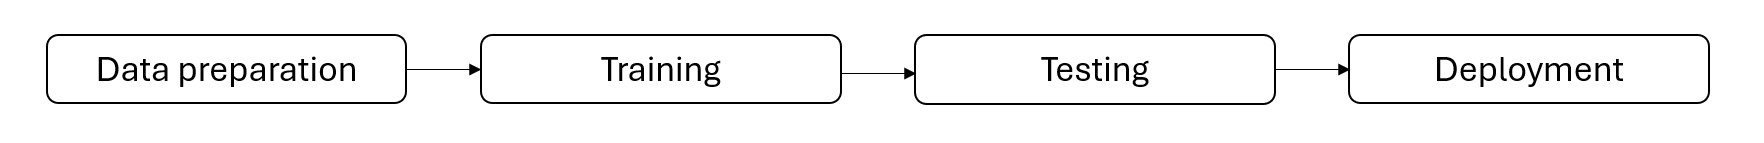

## 1. Data Preparation






In this notebook, we will use MNIST dataset. So what is MNIST dataset?

The MNST digit dataset consists of 8x8 pixel images of digits. The `images` attribute of the dataset stores 8x8 arrays of grayscale values for each image. The `target` attribute of the dataset stores the digit each image represents. Now, we begin by loading the MNIST dataset.

In [145]:
from sklearn import datasets

raw_data = datasets.load_digits()

Now, let us try to visualize the first image in the dataset.

In [146]:
raw_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

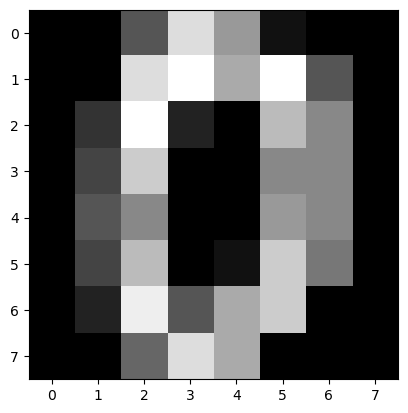

In [147]:
import matplotlib.pyplot as plt
plt.imshow(raw_data.images[0], cmap=plt.cm.gray)

The 64 pixel values correspond to the 8x8 grid of the image. For example again, the first instance can be reconstructed into an image, as shown below.

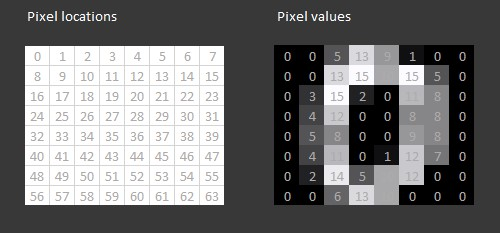

As part of data preparation, we need to flatten the images. The goal is to turn each 2D array of grayscale values from shape `(8,8)` into 1D array of shape `(64,)`. Subsequently, the entire dataset will be of shape `(n_samples, n_features)`, where `n_samples` is the number of images and `n_features` is the total number of pixels in each image.

In [148]:
n_samples = len(raw_data.images)
X = raw_data.images.reshape((n_samples, -1))

Note that, we use the variable `X` to save all the pixel values of all images. Likewise, we are also going to save the classes for each image in variable `y`.

In [149]:
y = raw_data.target

The next thing to do is to perform data splitting. For simplicity, let us split the data into two sets: 70% `training` set,  and 30% `testing` set.

* **Training Set**: For learning and adjusting parameters.
* **Testing Set**: For final evaluation on unseen data.


In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # targets
    train_size=0.7, # 70% training set
    stratify=raw_data.target, # split according to even distribution of targets
    shuffle=True
)

Alright! So now, you need to remember that:


1.   `X_train` and `y_train` correspond to the features and targets in the training set.
2.   `X_test` and `y_test` correspond to the features and targets in the testing set.



## 2. Training




By now, the data is ready for training. The first thing to do is to find a learning `algorithm`. Scikit-learn supports various learning algorithms for the classification task, such as:


*   k-nearest neighbors (KNN)
*   Support vector machines (SVM)
*   Gaussian Process
*   Decision Tree
*   Random Forest
*   Artificial Neural Network - Multilayer Perceptron (ANN-MLP)
*   AdaBoost
*   Naive Bayes (NB)
*   Quadratic Discrimination Analysis (QDA)

In this notebook, I will only introduce ANN-MLP, which is the basic structure of neural networks. In the future activities, you are going to learn about Deep Learning. Most deep learning models have architectures structured from neural networks and some advanced layers such as Convolution, Max-Pooling, etc. That is why it is essential that you learn the basic ANN at this moment. (Note: if you want to learn the other learning algorithms, you are free to change the succeeding code snippets. Go to scikit-learn webpage for the official documentation.)

In [151]:

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(200, 180), # means 16 nodes at 1st hidden layer and 8 nodes at 2nd hidden layer
    warm_start=False # set to retain weights between fits
)

Based on the code snippet, the MLP classification model has 16 nodes at 1st hidden layer and 8 nodes at 2nd hidden layer. The network is illustrated as follows.

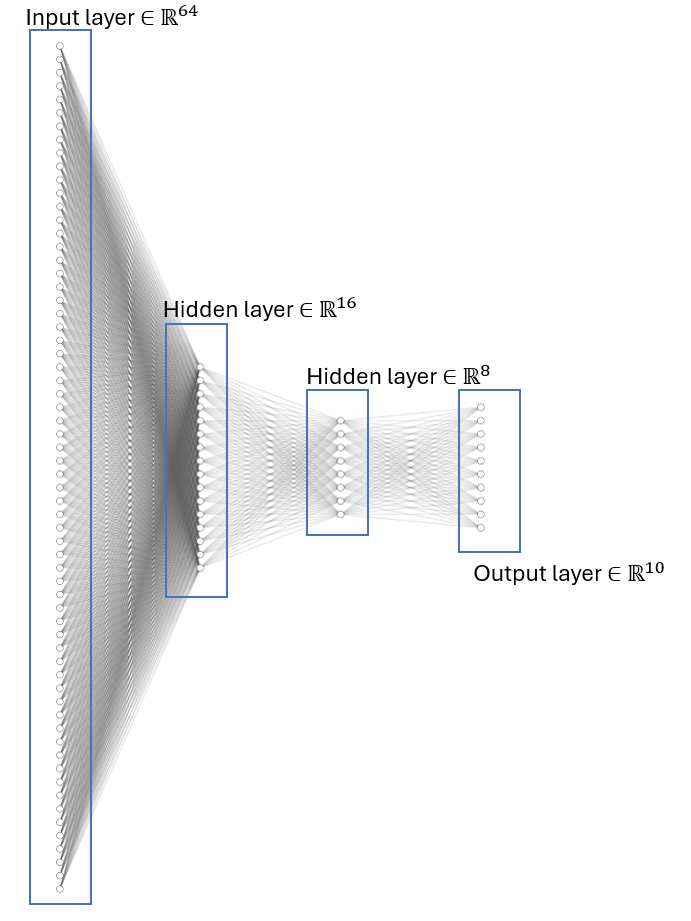

In this activity, we will train the model by calling the `.fit()` function available in Scikit-learn.

In [152]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 180))

**Important**: *If you have a small dataset with numerical data, you can train the model on the entire training set at once. However, this approach may not work when dealing with larger datasets, as your system's RAM might not be able to handle all the data simultaneously.*

**Challenge**: How to solve the problem about memory allocation error?

**Important**: *One common mistake of the programmers is they forgot to save the model.*

**Challenge**: When is the right time to save the trained model?

To save, we will use `joblib` library, which is recommended for Scikit-learn models.

In [153]:
import joblib

joblib.dump(model, 'mlp_model_e1.pkl')

['mlp_model_e1.pkl']

Observe that the model is saved in the same directory as the csv file.

## 3. Testing

The next stage is to evaluate the network's performance using the testing set. Notice that we use the `X_test` and `y_test`.

1.   `classification_report` is a performance evaluation metric for classification models. It provides a comprehensive summary of key metrics, such as precision, recall, F1-score, and support for each class in a classification task.
  
  * `Precision`: The proportion of true positive predictions out of all predicted positive instances.
  <br>$Precision = \dfrac{TP}{TP+FP}$

  * `Recall`: The proportion of true positive predictions out of all actual positive instances.
  <br>$Recall = \dfrac{TP}{TP+FN}$

  * `F1-score`: The harmonic mean of precision and recall, providing a balanced measure between the two.
  <br> $F1 = 2 \times \dfrac{Precision \times Recall}{Precision + Recall}$

2.   `confusion_matrix`: is a performance measurement tool used in classification tasks to evaluate how well a classification model performs. It provides a visual breakdown of the predictions made by the model compared to the actual outcomes. The matrix is especially useful for understanding misclassification patterns.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      1.00      1.00        55
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        54
           8       0.98      0.94      0.96        52
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



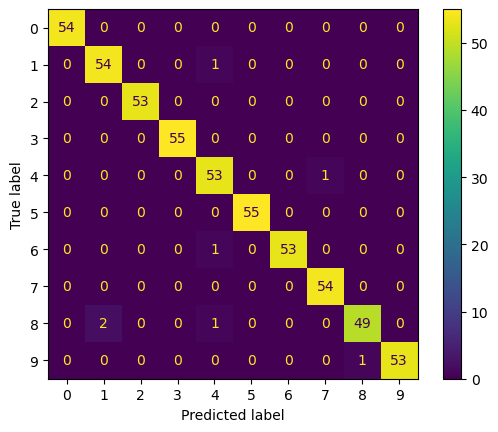

In [154]:
from sklearn import metrics

y_test_pred = model.predict(X_test)
print(f"{metrics.classification_report(y_test, y_test_pred)}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

**Important**: *The peformance results using the testing set is the one that you published in your manuscript, not the results from validation set.*

## 4. Deployment



**Important**: *When deploying your system, you are not required to re-run the training, but you just need to run feedforward prediction using the saved model.*

To simulate the deployment process, we will remove the `model` parameter from RAM. This can be done by calling the `del` keyword in python.

In [155]:
model # is active before deletion

MLPClassifier(hidden_layer_sizes=(200, 180))

In [156]:
#del model

In [157]:
model # is not defined after deletion

MLPClassifier(hidden_layer_sizes=(200, 180))

The previous code stipulates that the `model` is no longer available at RAM. By this, we can simulate the deployment process by importing the saved model to the environment here.

In [158]:
model = joblib.load('mlp_model_e1.pkl')

Now let us try to perform `real-time inference` using the new unseen data below.

In [159]:
import numpy as np 
x_new = np.array([ 0, 0, 0, 5, 9, 0, 0, 0, 
                  0, 0, 2, 14, 14, 22, 0, 0, 
                  0, 0, 6, 14, 11, 9, 0, 0, 
                  0, 3, 15, 3, 11, 5, 0, 0, 
                  0, 8, 11, 0, 13, 6, 2, 0, 
                  6, 10, 16, 16, 12, 15, 17, 
                  0, 0, 0, 4, 10, 15, 3, 0, 
                  0, 0, 0, 0, 11, 13, 2, 0, 0 ]).astype('float64').reshape(1, -1) 
y_new_pred = model.predict(x_new) 
print(f"Predicted digit = {y_new_pred[0]}")

Predicted digit = 4


The predicted digit must be `4` since `x_new` looks like this photo.

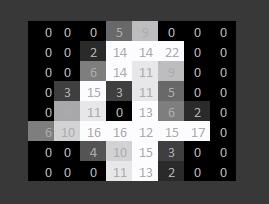

**Challenge**: Remove the keyword `.astype('float64')` from the last code, and observe the result.

**Challenge**: Remove the keyword `.reshape(1, -1)` from the last code, and observe the result.

**Important**: *The preprocessing steps you apply to your data before training should be the same steps applied during inference.*

**Challenge**: Try to run this [Python script](https://drive.google.com/file/d/17ejxZKZ80pGXgOYAAg_cpkv2Mdzaspcu/view?usp=drive_link) in offline mode, not here in Google Colab. Make sure to place both Python script and trained model (`mlp_model_e1.pkl`) in the same directory.

In [160]:
# End of notebook. Nothing follows ...